# Assignment 7
### Do any five.

## 1. 

- What is the expected value of a single die roll? 
- What is the expected value of rolling two dice and adding the results together?
- What is the expected winnings of any gamble in European roulette?

- Imagine you roll a die, and you record the value you get. But, if you roll a six, you roll again, and add that value. What is the expected value?
- Imagine that the process described in the last question continues until you fail to roll a six. What is the expected value of the process? (This can be tricky, you can simulate it to get an answer if you prefer. Hint: The answer is 4.2.)

#### 1A
* The expected value of a single dice roll is 3.5. We get 3.5 by adding the weighted average of all possible values of the die. 
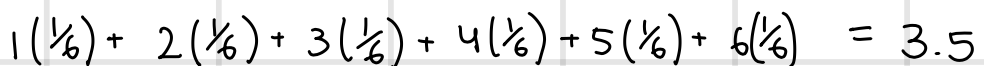
#### 1B
* The expected value of rolling two dice 7 because 3.5+3.5 = 7
#### 1C
* 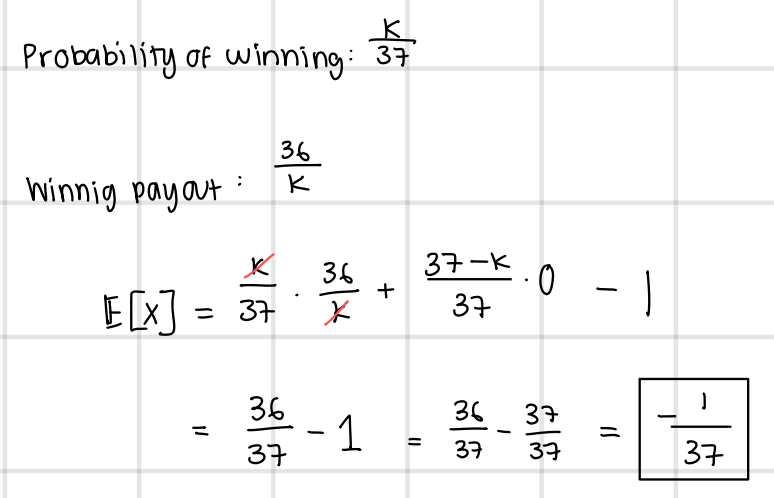
#### 1D
* The expected value is 1(1/6) + 2(1/6) + 3(1/6) + 4(1/6)+ 5(1/6) + 6(1/6) + 1/6[1(1/6) + 2(1/6) + 3(1/6) + 4(1/6)+ 5(1/6) + 6(1/6)] = 49/12 
#### 1E
* 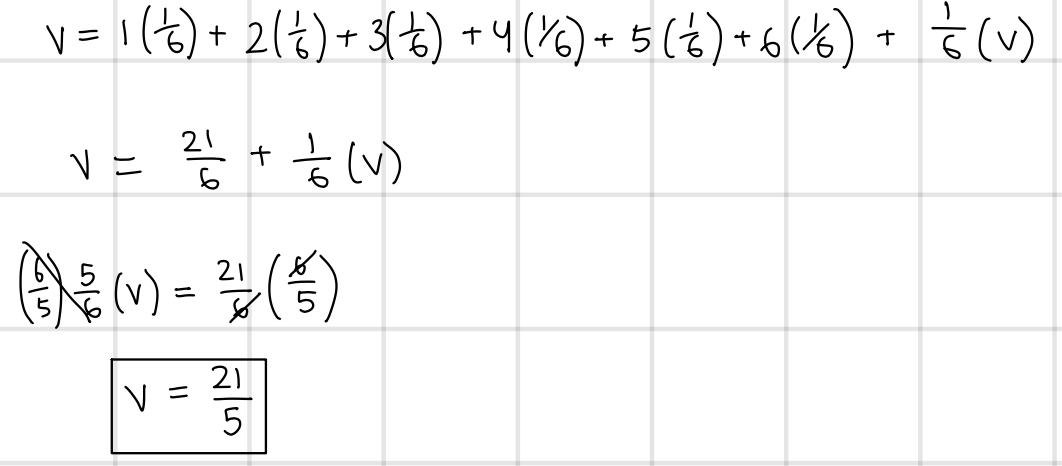

## 2. 
- Compute the expected value for a uniform random variable.
- Show that $\mathbb{E}[a+bX] = a + b\mathbb{E}[X]$
- Show, by example, that $v(\mathbb{E}[X]) \neq \mathbb{E}[v(X)]$, if $v(x) \neq a+bx$. For example, try $v(y) = y^2$ or $v(y)=\sqrt{y}$ with a Bernoulli or uniform or normally distributed random variable. This can be an important thing to remember: The expectation of a transformed random variable is not the transformation of the expected value.

#### 2A
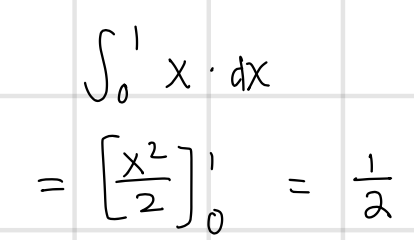

#### 2B 
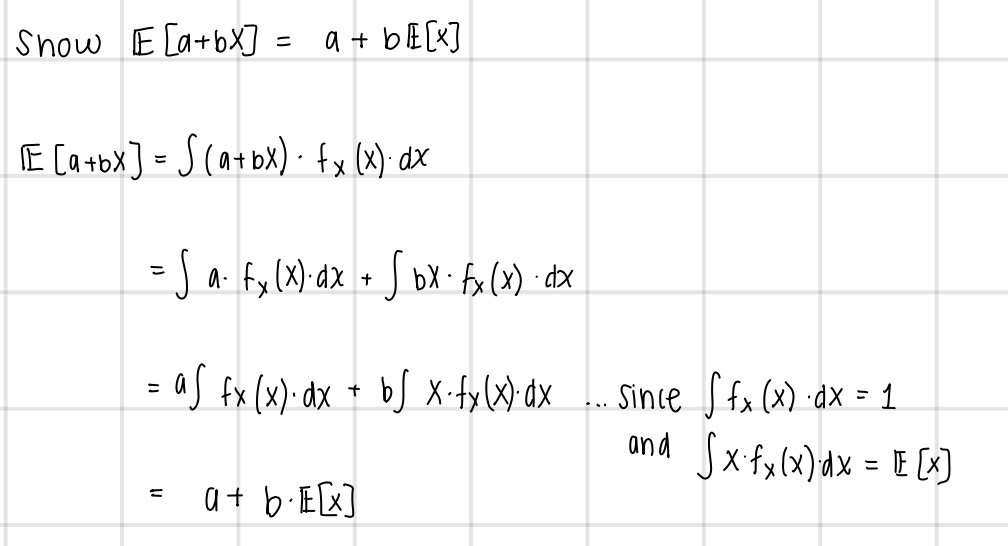

#### 2C

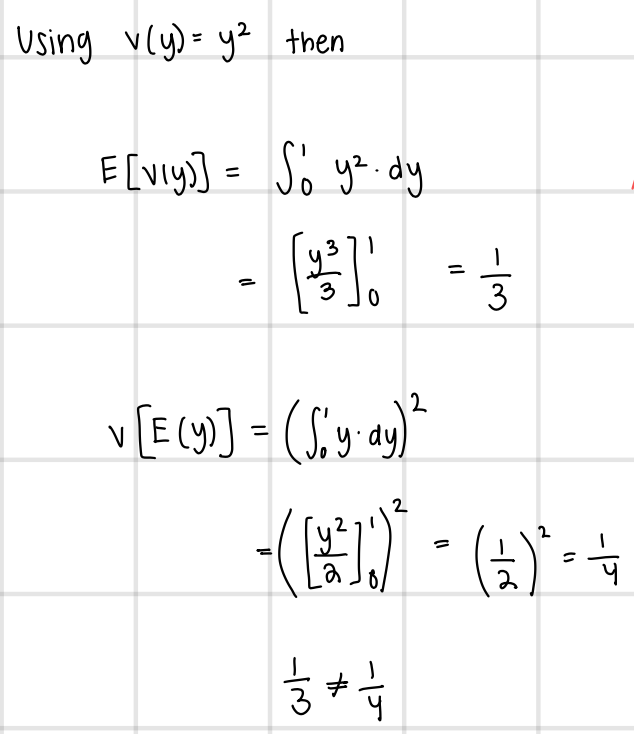

## 3. 
- Compute the variance for a uniform random variable.
- Show that 
$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2
$$
$$
\mathbb{V}[a+bX] = b^2 \mathbb{V}[X]
$$
- Show that if $X$ is a normally distributed random variable, then $a + bX$ is distributed normally with mean $a+ b \mathbb{E}[X]$ and variance $b^2 \sigma_X^2$ 

These properties get used all the time!


#### 3A
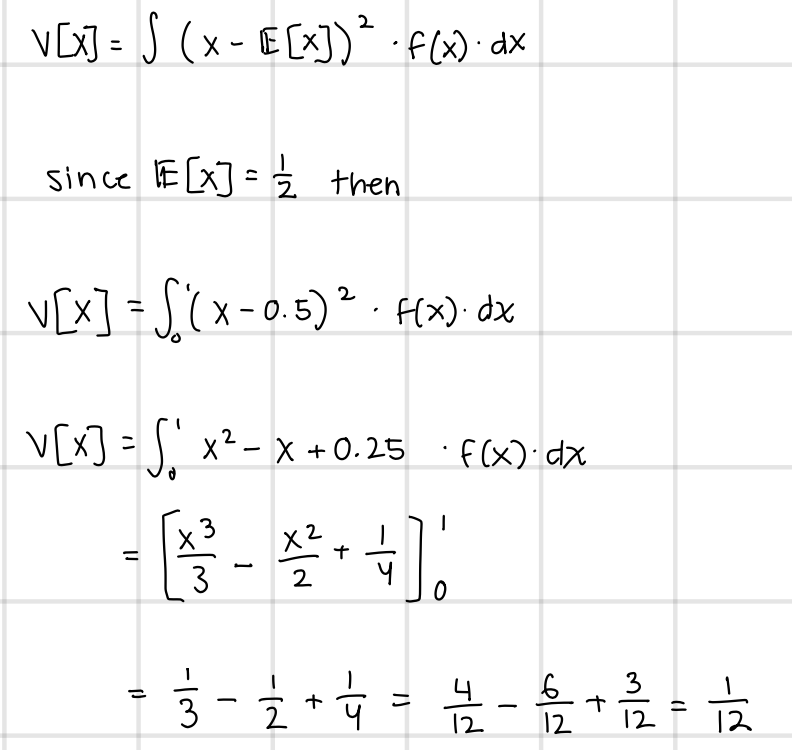


#### 3B
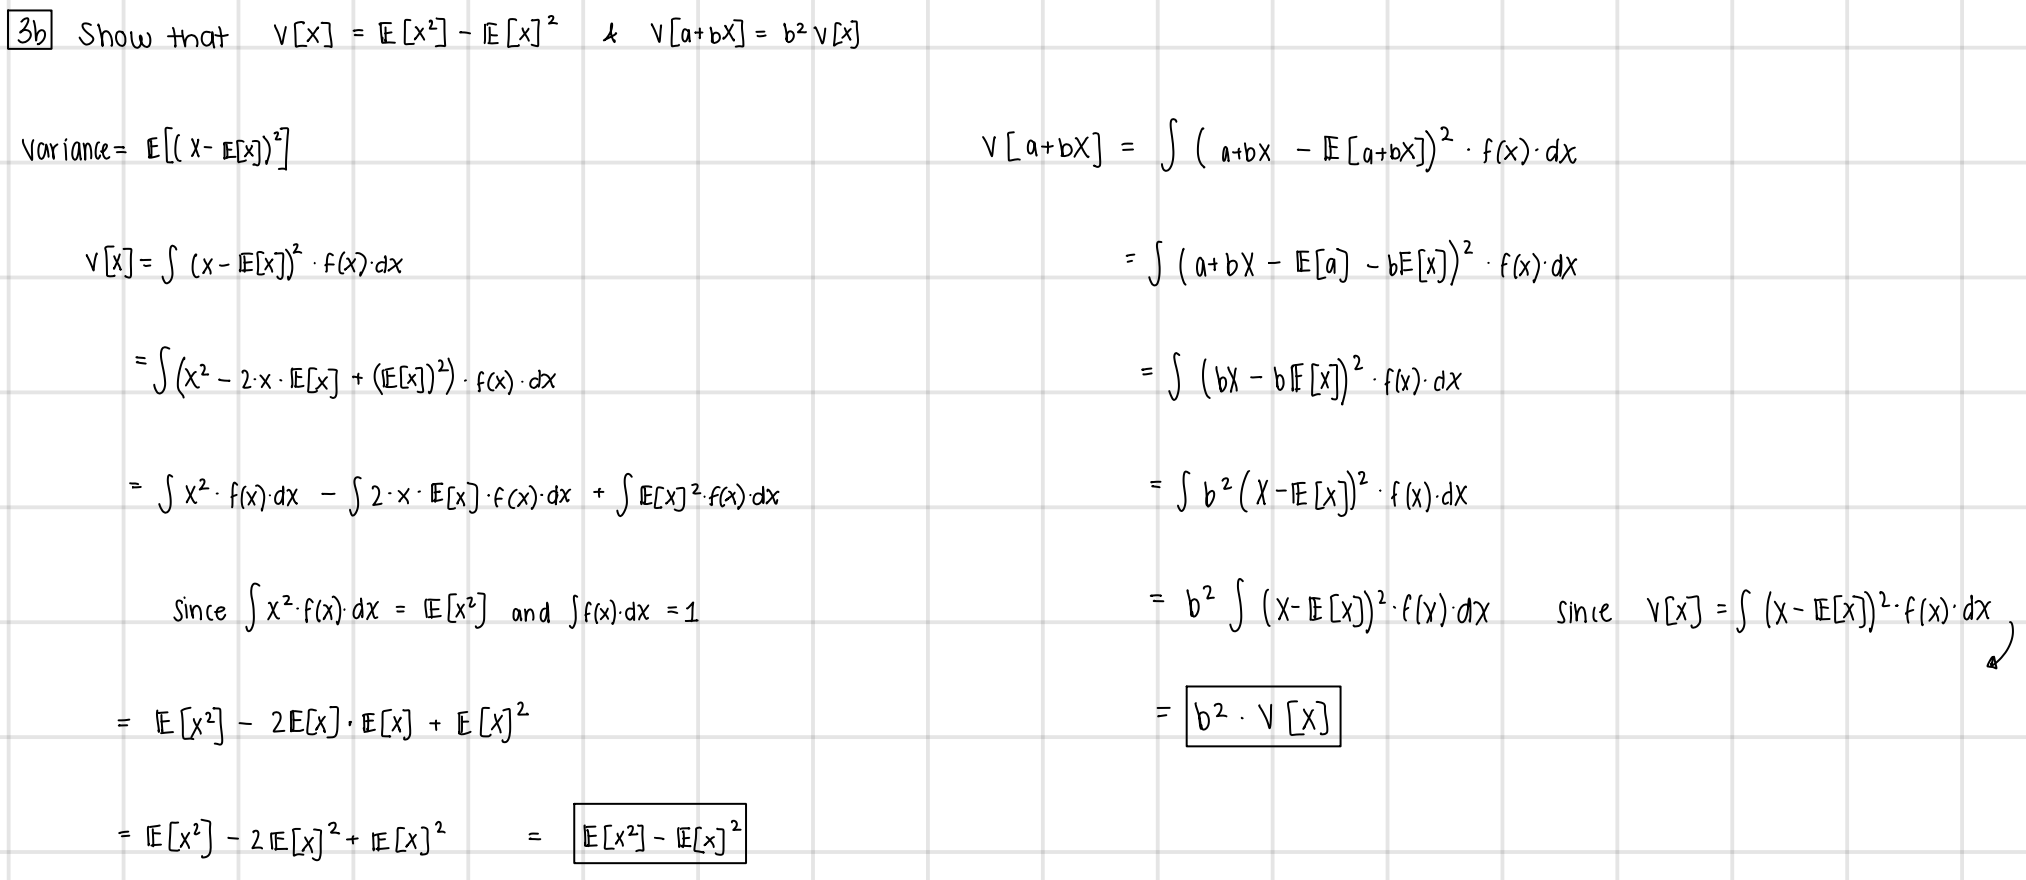 


#### 3C 
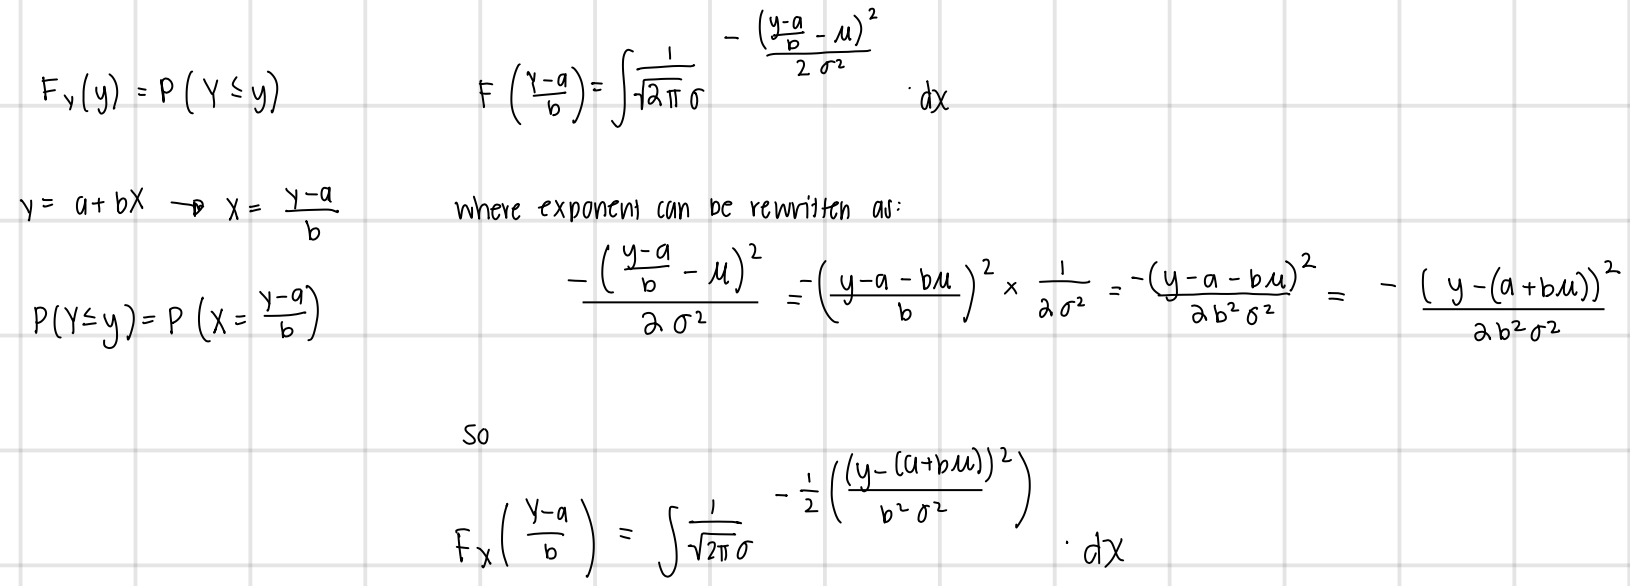

## 6.
- Use the Taylor series expansions 
$$
F(x+h) = F(x) + hf(x) + \frac{h^2}{2}f'(x) + O(h^3)
$$ 
and 
$$
F(x-h) = F(x) - h f(x) + \frac{h^2}{2} f'(x)+ O(h^3)
$$
to show that
$$
\mathbb{E}[\hat{f}_{X,h}(x)] = \frac{F(x+h)-F(x-h)}{2h} = f(x) + O(h^2),
$$
so the **bias** of the KDE is $O(h^2)$, unlike the ECDF, for which $\mathbb{E}[\hat{F}(x)] = F(x)$.

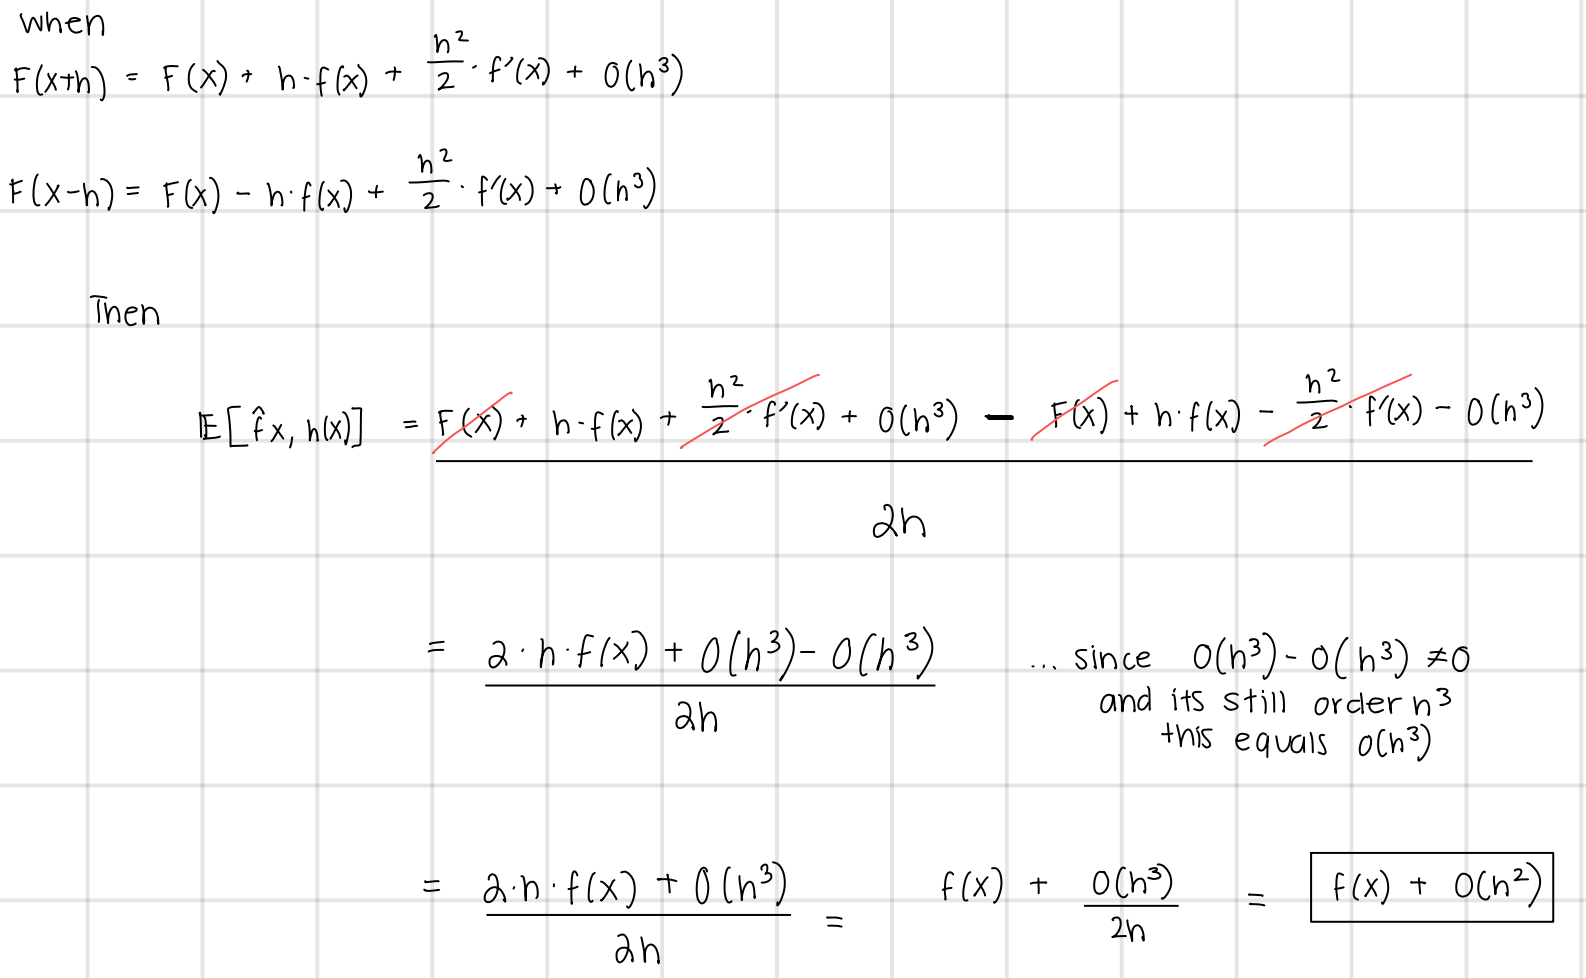

## 8.
- Open the METABRIC data. Make a histogram of 'Ratio Therapy'.
- Let treatment, $T$ be distributed binomial with parameter $p$. Then the contribution to the likelihood for each patient $i$, with $y_i = 0$ for no radiation therapy and $y_i=1$ for radiation therapy, is 
$$
p^{y_i}(1-p)^{1-y_i}
$$
- Write out the likelihood.
- Maximize the likelihood with respect to $p$. What is the MLE, $\hat{p}$?
- Bootstrap the sampling density/distribution of $\hat{p}$.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

#### 8A

<Axes: xlabel='Radio Therapy', ylabel='Count'>

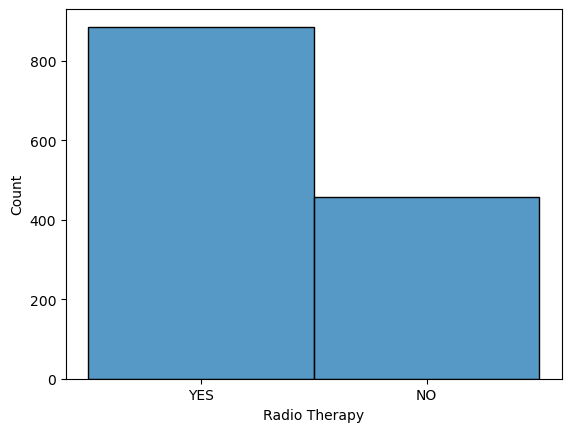

In [3]:
df = pd.read_csv('../data/metabric.csv')
sns.histplot(df['Radio Therapy'], stat = 'count')

#### 8B
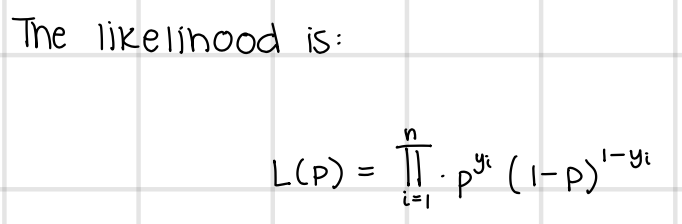

#### 8C

In [39]:
import scipy as sp 
import matplotlib.pyplot as plt

y = pd.to_numeric(df['Radio Therapy'].replace({'YES': '1.0', 'NO': '0.0'}),errors='coerce')
print(f'MLE is',y.mean())

MLE is 0.659717051377513


#### 8D

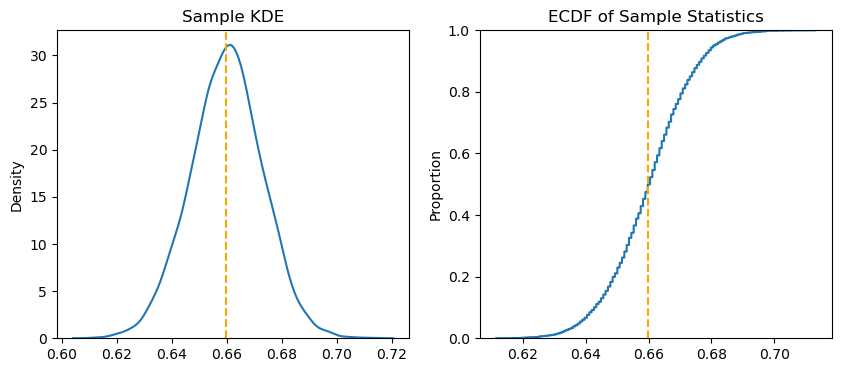

In [ ]:
y.value_counts()
y = y.dropna()

estimates = [y.sample(frac=1.0,replace=True).mean() for s in range(5000)]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.kdeplot(estimates, ax = axes[0]).set(title='Sample KDE')
axes[0].axvline(x=y.mean(), color='orange', linestyle='--')
sns.ecdfplot(estimates, ax = axes[1]).set(title='ECDF of Sample Statistics')
axes[1].axvline(x=y.mean(), color='orange', linestyle='--')
plt.show()